In [30]:
#cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [31]:
df = pd.read_csv('./datasets/backfill_median_data.csv')

In [32]:
df.head()

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
0,11 Com b,11 Com,Xinglong Station,326.03000,1.29,12.1,1.08,6165.6000,19.40,0.231,98.09,1700.0
1,11 UMi b,11 UMi,Thueringer Landessternwarte Tautenburg,516.21997,1.53,12.3,1.09,4684.8142,14.74,0.080,98.09,1700.0
2,14 And b,14 And,Okayama Astrophysical Observatory,185.84000,0.83,12.9,1.15,1525.5000,4.80,0.000,98.09,1700.0
3,14 Her b,14 Her,W. M. Keck Observatory,1773.40002,2.93,12.9,1.15,1481.0878,4.66,0.370,98.09,1700.0
4,16 Cyg B b,16 Cyg B,Multiple Observatories,798.50000,1.66,13.5,1.20,565.7374,1.78,0.680,98.09,1700.0


 Dictionary found here:
 https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html

In [33]:
df.shape

(4364, 12)

In [34]:
df.describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
count,4.364000e+03,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000
mean,2.038742e+03,5.421018,5.675148,0.506446,465.744018,1.465821,0.074452,453.786045,931.816453
std,1.105449e+05,91.063696,5.393391,0.481241,4160.491764,13.092439,0.145131,1997.498990,476.461326
min,9.070629e-02,0.004400,0.296000,0.026000,0.020000,0.000060,0.000000,0.060000,50.000000
25%,4.554625e+00,0.052775,1.750000,0.156000,3.890000,0.012293,0.000000,24.582500,577.000000
50%,1.225190e+01,0.101150,2.728000,0.243000,8.400000,0.026400,0.000000,98.090000,840.000000
75%,4.581893e+01,0.260050,11.882000,1.060000,166.378688,0.523500,0.090000,308.632500,1174.500000
max,7.300000e+06,3500.000000,77.342000,6.900000,239000.000000,752.000000,0.950000,44900.000000,4050.000000


In [35]:
#columns with crazy outliers:
#pl_orbper
#pl_rade
#pl_radj
#pl_bmasse
#pl_bmassj
#pl_insol
#pl_eqt

In [36]:
df.dtypes

pl_name           object
hostname          object
disc_facility     object
pl_orbper        float64
pl_orbsmax       float64
pl_rade          float64
pl_radj          float64
pl_bmasse        float64
pl_bmassj        float64
pl_orbeccen      float64
pl_insol         float64
pl_eqt           float64
dtype: object

In [37]:
df.isna().sum()

pl_name          0
hostname         0
disc_facility    0
pl_orbper        0
pl_orbsmax       0
pl_rade          0
pl_radj          0
pl_bmasse        0
pl_bmassj        0
pl_orbeccen      0
pl_insol         0
pl_eqt           0
dtype: int64

## EDA

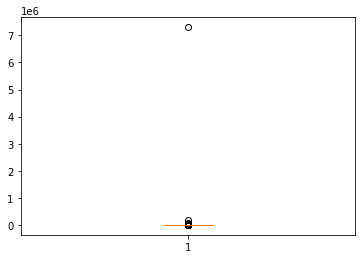

In [38]:

plt.boxplot(df['pl_orbper']);
#dang!  that maximum is a massive outlier.
#this is a measure of the length (in earth days) of an orbit of an exoplanet
#maybe we drop that planet out

In [39]:
df['pl_orbper'].max()

7300000.0

In [40]:
df[df['pl_orbper'] == 7300000.0]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
3991,Oph 11 b,Oph 11,Gemini Observatory,7300000.0,243.0,12.3,1.1,4449.62,14.0,0.19,1.21,2175.0


In [41]:
df = df.drop(index = 3991)

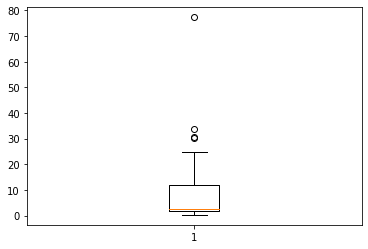

In [42]:
plt.boxplot(df['pl_rade']);

In [43]:
df['pl_rade'].max()

77.342

In [44]:
df[df['pl_rade']== 77.342]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
387,HD 100546 b,HD 100546,Paranal Observatory,157.57001,53.0,77.342,6.9,239000.0,752.0,0.09,98.09,840.0


In [45]:
df = df.drop(index = 387)

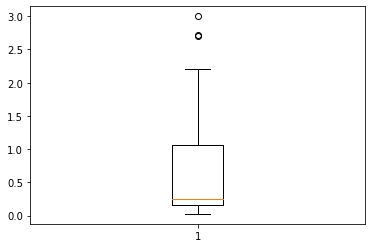

In [46]:
plt.boxplot(df['pl_radj']);

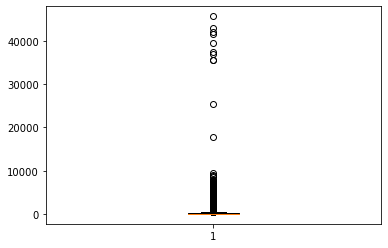

In [47]:
plt.boxplot(df['pl_bmasse']);

In [48]:
df['pl_bmasse'].max()

45700.0

In [49]:
df[df['pl_bmasse'] == 45700]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
1345,K2-52 b,K2-52,K2,3.535055,0.054,18.0,1.606,45700.0,144.0,0.07,1124.0,2004.0


In [50]:
df = df.drop(index = 1345)

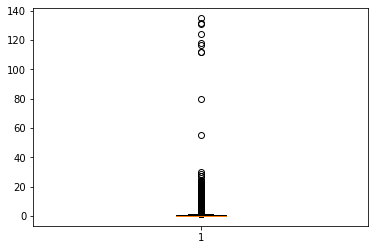

In [51]:
plt.boxplot(df['pl_bmassj']);

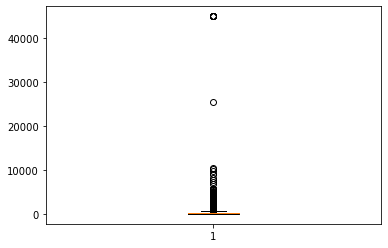

In [52]:
plt.boxplot(df['pl_insol']);

In [53]:
df['pl_insol'].max()

44900.0

In [54]:
df[df['pl_insol'] == 44900.0]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
1418,KELT-3 b,KELT-3,KELT,2.703390,0.04123,17.486,1.560,616.59020,1.940,0.00,44900.0,1816.0
1419,KELT-4 A b,KELT-4 A,KELT,2.989593,0.04317,19.044,1.699,286.68266,0.902,0.00,44900.0,1823.0
1420,KELT-6 b,KELT-6,KELT,7.845700,0.07939,14.572,1.300,165.27160,0.520,0.22,44900.0,1313.0
1421,KELT-6 c,KELT-6,Multiple Observatories,1276.000000,2.39000,13.000,1.160,1179.14930,3.710,0.21,44900.0,2048.0
1422,KELT-7 b,KELT-7,KELT,2.734770,0.04415,17.934,1.600,441.78370,1.390,0.00,44900.0,2048.0
1423,KELT-8 b,KELT-8,KELT,3.244060,0.04550,18.159,1.620,209.76780,0.660,0.04,44900.0,1675.0
1424,KELT-9 b,KELT-9,KELT-North,1.481124,0.03462,21.196,1.891,915.35040,2.880,0.00,44900.0,4050.0


In [55]:
#going to remove these:  I suspect these values are backfilled from KELT-9 b, which orbits an unusually hot star.
df = df.drop(index = df[df['pl_insol'] == 44900.0].index)

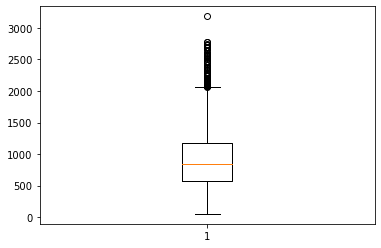

In [56]:
plt.boxplot(df['pl_eqt']);

In [57]:
df.to_csv('./datasets/clean_planetary_data.csv')

In [58]:
df.columns

Index(['pl_name', 'hostname', 'disc_facility', 'pl_orbper', 'pl_orbsmax',
       'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen',
       'pl_insol', 'pl_eqt'],
      dtype='object')